In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230418143709922915'

In [9]:
import matplotlib.pyplot
import numpy
import torch
from IPython.display import display

In [11]:
def generator(m):
    N=50
    x = torch.randn(N,1)
    y = m*x+numpy.random.randn(N,1)/2
    return x,y

In [15]:
def modeler(x,y):

    # build the model
    nn = torch.nn.Sequential(
        torch.nn.Linear(1,1),
        torch.nn.ReLU(),
        torch.nn.Linear(1,1)
    )

    # loss function
    lossfun = torch.nn.MSELoss()

    # optimizer
    optimizer = torch.optim.SGD(nn.parameters(),lr=.05)

    # train the model
    epochs = 500
    losses = torch.zeros(epochs)

    for idx in range(epochs):

        # forward pass
        pred = nn(x.float())

        # compute loss
        loss = lossfun(pred,y.float())
        losses[idx] = loss

        #backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # compute model predictions
    predictions = nn(x)

    return predictions,losses

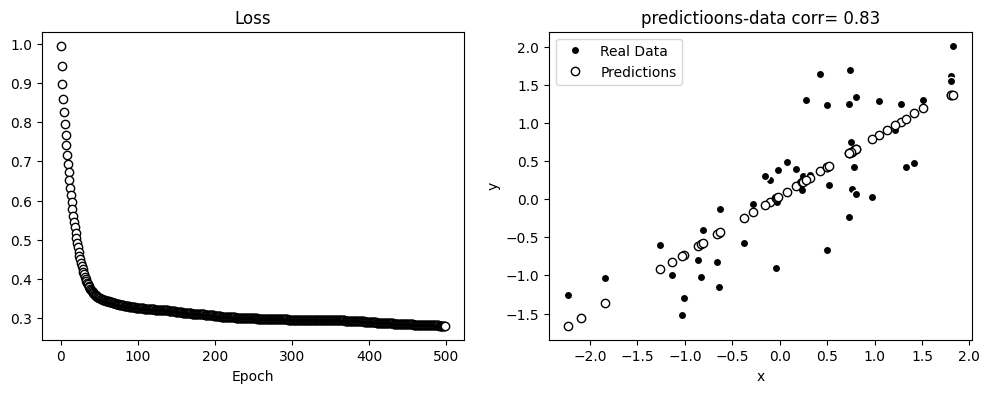

In [28]:
# create a dataset
x,y = generator(.8)

pred,losses = modeler(x,y)

fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'ko',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')


ax[1].plot(x,y,'wo',label='Real Data',markerfacecolor='black')
ax[1].plot(x,pred.detach(),'ko',label='Predictions',markerfacecolor='white')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'predictioons-data corr= {numpy.corrcoef(y.T,pred.detach().T)[0,1]:.2f}')
ax[1].legend()

matplotlib.pyplot.show()




In [30]:
slopes = numpy.linspace(-2,2,21)

experiments = 50

# initialize output matrix 
results = numpy.zeros((len(slopes),experiments,2))

for sidx in range(len(slopes)):
    for N in range(experiments):
        # creaate a dataset aand run the model
        x,y = generator(slopes[sidx])
        pred,losses = modeler(x,y)

        results[sidx,N,0] = losses[-1]
        results[sidx,N,1] = numpy.corrcoef(y.T,pred.detach().T)[0,1]

results[numpy.isnan(results)]=0


/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ahmed/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
fig,ax = matplotlib.pyplot.plot